# Monte Carlo Methods

In [157]:
# Import and define shit
using PyPlot, Distributions, LaTeXStrings, PyCall
myblue_t = (0,0.75,1);
myblue_m = reshape([0,0.75,1],(1,3))
plt.style[:use]("mystyle.mplstyle")
plt.style[:available];

## Generating Random Variables

### Inverse Transform Method

#### Intuition

Start by considering the CDF of a Beta-distributed random variable $X_i \sim \text{Beta}(\alpha,\beta)$ (example below). By definition, for any draw $\hat{x}_i$, we know that $F(\hat{x}_i)$ must lie on [0,1].

So the basic idea behind the inverse transform method is to throw $\text{Unif}[0,1]$ draws, denoted $\hat{u}_i$, against the $y$-axis, and find out the corresponding unique $\text{Beta}(\alpha,\beta)$ draws, denoted $\hat{x}_i$, on the $x$-axis. The dash lines show specific examples.

When the CDF is steep, a small change in a $\hat{u}_i$ draw won't change the corresponding $\hat{x}_i$ very much; therefore, we'll accumulate lots of mass clustered around that $\hat{x}_i$ over many draws. The opposite holds when the CDF is flat. In this way, we map uniform draws (which are easy to draw from using fast algorithms) directly into draws that match other highly non-uniform distributions. 

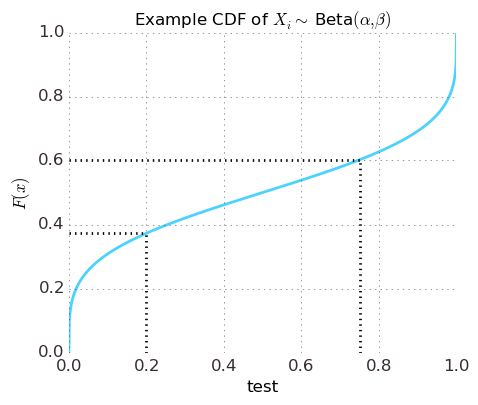

PyObject <matplotlib.text.Text object at 0x1e073f10>

In [104]:
α, β = 0.25, 0.25
f, F = map((fcn) -> ((x) -> fcn(Beta(α,β), x)), [pdf, cdf])
x = 0:0.001:1
    lines_at = [0.2, 0.75];

figure(figsize=(5,4))
plot(x,F(x), alpha=0.7);
p = Array(Any,4);
p[1:2] = map(x -> plot([x, x], [0, F(x)]),    lines_at); 
p[3:4] = map(x -> plot([0, x], [F(x), F(x)]), lines_at);
map((ph) -> setp(ph, color="black", linestyle=":"), p)
ylabel(L"$F(x)$"); title(L"Example CDF of $X_i \sim $ Beta$(\alpha,\beta)$"); xlabel("test")

#### Mathematics

#### Example

In this next example, suppose we want to draw $X_i \sim \text{Exp}(\lambda)$. This has pdf and cdf as follows:

$$
    f(x) = \lambda e^{-\lambda x} \qquad F(x) = 1 - e^{-\lambda x} 
    \quad \Rightarrow \quad F^{-1}(u) = -frac{1}{\lambda}\ln(1-u)
$$


Below, we simulate $N$ draws from a uniform as collected in the histogram, apply the inverse transform via $F^{-1}(\hat{u}_i)$, and then show the sample cdf and pdf against their analytical form.

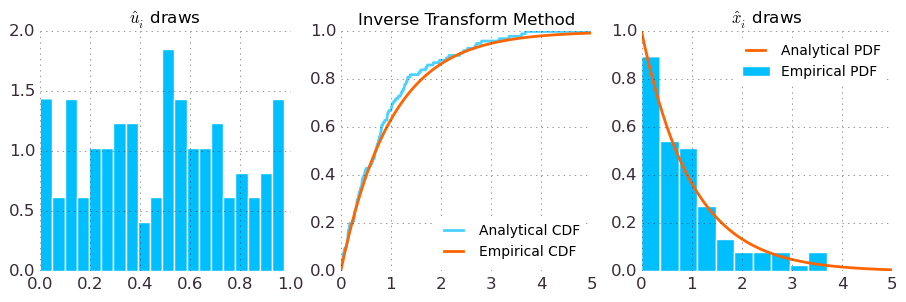

In [178]:
N = 100
λ = 1
f, F = map((fcn) -> ((x) -> fcn(Exponential(λ), x)), [pdf, cdf])
Finv = (u) -> -(1/λ)*log(1 - u)

u_draws = rand(N)
x_draws = Finv(u_draws)
support, counts = hist(x_draws, 0:0.01:5)

figure(figsize=(11,3))
subplot(131)
plt.hist(u_draws, 20, normed=1), title(L"$\hat{u}_i$ draws")
subplot(132)
plot(support[2:end], cumsum(counts)/N, alpha=0.7)
plot(support, F(support))
title("Inverse Transform Method")
legend(("Analytical CDF", "Empirical CDF"), loc="lower right")
subplot(133)
plt.hist(x_draws, normed=1)
plot(support, f(support))
legend(("Analytical PDF", "Empirical PDF"))
title(L"$\hat{x}_i$ draws");